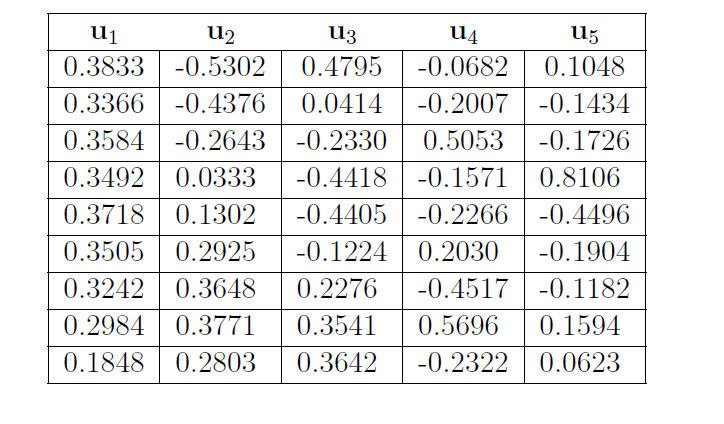

In [93]:
import numpy as np
from IPython.display import Image
Image("qs1_answer.png")

Using Scikit-learn and Numpy to code and play around with a question from my Mathematics for Data Science module, Y3, Sem 2. 

**QS1:** Consider  the  yield  curve  for  Treasury  securities.   The  "yield"  is  theinterest rate paid on the bonds, which depends on the time to maturity(called "tenor").  The yield is varied from day to day by the FederalReserve.  The table below shows the interest rate over 6 business daysof 2001.

The  PCA  is  used  to  analyse  this  data. First,  we  construct  the  differences  of  the  interest  rate  between  days  with  the  mean  difference subtracted from each row. Therefore, our data matrix A is 9-by-5 matrix  with  its  rows  adding  to  zero. The  singular  vectors $ u_i $ of A for $i= 1, \cdots , 5$  are given in the table below.

I want to better undestand my lecturer's calculations, as well as using Scikit-learn and Numpy so I will try to recreate his output of the orthogonal basis vectors $ {u_1, \cdots , u_5} $.


----------------------
PCA

If X is our m-by-n data matrix with for example rank(X) < min(m,n). Then 

$X = USV^T$

We expect the attribute ```.components_``` from ```scikit-learn``` to be equal to

$XV = US$. 
 

In [3]:
arr = np.array([5.87, 5.69, 5.37, 5.12, 5.19, 5.24, 5.58, 5.44, 5.20, 4.98, 5.03, 5.11, 5.11, 5.04, 4.82, 4.60, 4.61, 4.71, 4.87, 4.92, 4.77, 4.56, 4.54, 4.64, 4.82, 4.92, 4.78, 4.57, 4.55, 4.65, 4.76, 4.94, 4.82, 4.66, 4.65, 4.73, 4.97, 5.18, 5.07, 4.93, 4.94, 4.98, 4.92, 5.14, 5.03, 4.93, 4.94, 4.98, 5.46, 5.62, 5.56, 5.50, 5.52, 5.53])

In [11]:
data = arr.reshape(9,6)
data

array([[5.87, 5.69, 5.37, 5.12, 5.19, 5.24],
       [5.58, 5.44, 5.2 , 4.98, 5.03, 5.11],
       [5.11, 5.04, 4.82, 4.6 , 4.61, 4.71],
       [4.87, 4.92, 4.77, 4.56, 4.54, 4.64],
       [4.82, 4.92, 4.78, 4.57, 4.55, 4.65],
       [4.76, 4.94, 4.82, 4.66, 4.65, 4.73],
       [4.97, 5.18, 5.07, 4.93, 4.94, 4.98],
       [4.92, 5.14, 5.03, 4.93, 4.94, 4.98],
       [5.46, 5.62, 5.56, 5.5 , 5.52, 5.53]])

In [66]:
import pandas as pd

In [68]:
df = pd.DataFrame(data, columns = ['Jan 3','Jan 4','Jan 5', 'Jan 6', 'Jan 7', 'Jan 10'], index = ['3MO', '6MO', '1Yr', '2Yr', '3Yr','5Yr','7Yr','10Yr', '20Yr'])

# Our data is: 
print(df)

      Jan 3  Jan 4  Jan 5  Jan 6  Jan 7  Jan 10
3MO    5.87   5.69   5.37   5.12   5.19    5.24
6MO    5.58   5.44   5.20   4.98   5.03    5.11
1Yr    5.11   5.04   4.82   4.60   4.61    4.71
2Yr    4.87   4.92   4.77   4.56   4.54    4.64
3Yr    4.82   4.92   4.78   4.57   4.55    4.65
5Yr    4.76   4.94   4.82   4.66   4.65    4.73
7Yr    4.97   5.18   5.07   4.93   4.94    4.98
10Yr   4.92   5.14   5.03   4.93   4.94    4.98
20Yr   5.46   5.62   5.56   5.50   5.52    5.53


In [18]:
print(data[0,0] - data[0,1])

print(data[0,1] - data[0,2])

0.17999999999999972
0.3200000000000003


In [17]:
new_data = np.diff(data, axis=1)
new_data # matches inital calcualtions in above cell 

array([[-0.18, -0.32, -0.25,  0.07,  0.05],
       [-0.14, -0.24, -0.22,  0.05,  0.08],
       [-0.07, -0.22, -0.22,  0.01,  0.1 ],
       [ 0.05, -0.15, -0.21, -0.02,  0.1 ],
       [ 0.1 , -0.14, -0.21, -0.02,  0.1 ],
       [ 0.18, -0.12, -0.16, -0.01,  0.08],
       [ 0.21, -0.11, -0.14,  0.01,  0.04],
       [ 0.22, -0.11, -0.1 ,  0.01,  0.04],
       [ 0.16, -0.06, -0.06,  0.02,  0.01]])

## Trial 1: Subtract the avr of all data from each row.

In [24]:
avr = np.mean(new_data)
avr # mean of all values

-0.03977777777777774

In [27]:
trial1 = new_data - avr
trial1

array([[-0.14022222, -0.28022222, -0.21022222,  0.10977778,  0.08977778],
       [-0.10022222, -0.20022222, -0.18022222,  0.08977778,  0.11977778],
       [-0.03022222, -0.18022222, -0.18022222,  0.04977778,  0.13977778],
       [ 0.08977778, -0.11022222, -0.17022222,  0.01977778,  0.13977778],
       [ 0.13977778, -0.10022222, -0.17022222,  0.01977778,  0.13977778],
       [ 0.21977778, -0.08022222, -0.12022222,  0.02977778,  0.11977778],
       [ 0.24977778, -0.07022222, -0.10022222,  0.04977778,  0.07977778],
       [ 0.25977778, -0.07022222, -0.06022222,  0.04977778,  0.07977778],
       [ 0.19977778, -0.02022222, -0.02022222,  0.05977778,  0.04977778]])

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=5)
pca.fit(trial1)

PCA(n_components=5)

In [33]:
print(pca.singular_values_)
print(pca.explained_variance_ratio_)

[0.51277949 0.13983385 0.07979097 0.02510096 0.01476977]
[9.07603441e-01 6.74931166e-02 2.19756827e-02 2.17478094e-03
 7.52978357e-04]


In [36]:
V = pca.components_
V

array([[-0.8414796 , -0.43147213, -0.29836901,  0.10684073,  0.07283459],
       [-0.22692492,  0.00106928,  0.65344493,  0.43491223, -0.57651107],
       [ 0.48432035, -0.74204745, -0.25214023,  0.29015159, -0.25891454],
       [ 0.04113264, -0.45507845,  0.63932303, -0.13922874,  0.6025721 ],
       [ 0.06449081,  0.23685407, -0.10806026,  0.83418453,  0.4818716 ]])

I am not sure I fully understand scikit-learn's output matrix, hence I want to double check my calculations with NumPy.

In [37]:
u, s, vh = np.linalg.svd(trial1, full_matrices=True)
u.shape, s.shape, vh.shape

((9, 9), (5,), (5, 5))

In [39]:
# What i wanted to investigate - does not match/ not similar to the result my lecturer has given us. 
# Hence we will try method 2 in trial 2
u[:5]

array([[ 0.40450363,  0.52878606, -0.47153651,  0.45024358, -0.03271777,
         0.09330862, -0.18403962, -0.04096063,  0.29388917],
       [ 0.35084593,  0.3890393 , -0.08385474, -0.53592801, -0.2426446 ,
        -0.05282063, -0.10325537, -0.11707807, -0.58759658],
       [ 0.36775184,  0.24302267,  0.20879514, -0.22191369,  0.48027929,
         0.03625432,  0.58051873,  0.33206276,  0.18332273],
       [ 0.35231449, -0.02831194,  0.46197934,  0.01629771, -0.09492666,
        -0.42931287, -0.01675869, -0.6082483 ,  0.31275381],
       [ 0.36732237, -0.12551913,  0.43973244,  0.13191198, -0.25021513,
        -0.00947821, -0.43808954,  0.61952864,  0.0108724 ]])

In [72]:
s

array([7.27708485e-01, 3.98586411e-01, 1.16953389e-01, 2.38985155e-02,
       4.64133948e-17])

In [78]:
S = np.round(np.diag(s),2)
S

array([[0.73, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.4 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

In [86]:
# S needs to be a 9-by-5 matrix so we add the extra 4x5, 0 rows 
extra = np.zeros(20).reshape(4,5)
extra

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [88]:
S_full = np.concatenate((S, extra), axis=0)
S_full

array([[0.73, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.4 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

In [89]:
np.round(np.matmul(u,S_full), 2)

array([[ 0.28,  0.21, -0.06,  0.  ,  0.  ],
       [ 0.25,  0.17, -0.01,  0.  ,  0.  ],
       [ 0.26,  0.11,  0.03, -0.01,  0.  ],
       [ 0.26, -0.01,  0.06,  0.  ,  0.  ],
       [ 0.27, -0.05,  0.05,  0.01,  0.  ],
       [ 0.26, -0.12,  0.01, -0.  ,  0.  ],
       [ 0.24, -0.15, -0.03,  0.01,  0.  ],
       [ 0.22, -0.15, -0.04, -0.01,  0.  ],
       [ 0.13, -0.11, -0.04,  0.  ,  0.  ]])

In [90]:
V

array([[-0.8414796 , -0.43147213, -0.29836901,  0.10684073,  0.07283459],
       [-0.22692492,  0.00106928,  0.65344493,  0.43491223, -0.57651107],
       [ 0.48432035, -0.74204745, -0.25214023,  0.29015159, -0.25891454],
       [ 0.04113264, -0.45507845,  0.63932303, -0.13922874,  0.6025721 ],
       [ 0.06449081,  0.23685407, -0.10806026,  0.83418453,  0.4818716 ]])

In [91]:
vh

array([[ 0.37402106, -0.51622728, -0.56341342,  0.23611914,  0.4695005 ],
       [-0.79448064, -0.11317209,  0.0765316 ,  0.46431679,  0.36680434],
       [-0.16735377,  0.48232204, -0.31742238, -0.56383851,  0.56629262],
       [-0.03002457,  0.53671867, -0.61314865,  0.45906841, -0.35261385],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ]])

The directions are note the same for Numpy and Scikit-learn. I am not sure exactly what the function ```pca.components_``` gives you. 

Hence in my next trial, I will only use NumPy.

## Traial 2: Subtract the avr of the data in each row from each row iteself.

In [49]:
means = new_data.mean(axis=1).reshape(9,1)
means

array([[-0.126],
       [-0.094],
       [-0.08 ],
       [-0.046],
       [-0.034],
       [-0.006],
       [ 0.002],
       [ 0.012],
       [ 0.014]])

In [53]:
ones = np.ones((1,5))
ones

array([[1., 1., 1., 1., 1.]])

In [55]:
a = means*ones
a

array([[-0.126, -0.126, -0.126, -0.126, -0.126],
       [-0.094, -0.094, -0.094, -0.094, -0.094],
       [-0.08 , -0.08 , -0.08 , -0.08 , -0.08 ],
       [-0.046, -0.046, -0.046, -0.046, -0.046],
       [-0.034, -0.034, -0.034, -0.034, -0.034],
       [-0.006, -0.006, -0.006, -0.006, -0.006],
       [ 0.002,  0.002,  0.002,  0.002,  0.002],
       [ 0.012,  0.012,  0.012,  0.012,  0.012],
       [ 0.014,  0.014,  0.014,  0.014,  0.014]])

In [57]:
trial2 = new_data - a
trial2 

array([[-0.054, -0.194, -0.124,  0.196,  0.176],
       [-0.046, -0.146, -0.126,  0.144,  0.174],
       [ 0.01 , -0.14 , -0.14 ,  0.09 ,  0.18 ],
       [ 0.096, -0.104, -0.164,  0.026,  0.146],
       [ 0.134, -0.106, -0.176,  0.014,  0.134],
       [ 0.186, -0.114, -0.154, -0.004,  0.086],
       [ 0.208, -0.112, -0.142,  0.008,  0.038],
       [ 0.208, -0.122, -0.112, -0.002,  0.028],
       [ 0.146, -0.074, -0.074,  0.006, -0.004]])

In [58]:
u, s, vh = np.linalg.svd(trial2, full_matrices=True)
u.shape, s.shape, vh.shape

((9, 9), (5,), (5, 5))

In [63]:
u[:,:5]

array([[ 0.38301829,  0.52919786, -0.47897581,  0.06049368, -0.26562905],
       [ 0.33646515,  0.43682328, -0.04602992,  0.21038865,  0.68640656],
       [ 0.35818013,  0.26342632,  0.22596793, -0.49184577, -0.42679128],
       [ 0.35272315, -0.0286657 ,  0.46042904,  0.09663509, -0.12414796],
       [ 0.37132783, -0.13116732,  0.43012237,  0.25840071, -0.04257   ],
       [ 0.34988744, -0.29346144,  0.11737198, -0.18857534,  0.38611349],
       [ 0.32341043, -0.36577034, -0.2287002 ,  0.45955691, -0.27233772],
       [ 0.29758096, -0.3780225 , -0.35157337, -0.57926041,  0.17115326],
       [ 0.18419354, -0.28090294, -0.3615494 ,  0.22750774, -0.07979118]])

In [64]:
np.round_(u[:,:5], decimals=4)

array([[ 0.383 ,  0.5292, -0.479 ,  0.0605, -0.2656],
       [ 0.3365,  0.4368, -0.046 ,  0.2104,  0.6864],
       [ 0.3582,  0.2634,  0.226 , -0.4918, -0.4268],
       [ 0.3527, -0.0287,  0.4604,  0.0966, -0.1241],
       [ 0.3713, -0.1312,  0.4301,  0.2584, -0.0426],
       [ 0.3499, -0.2935,  0.1174, -0.1886,  0.3861],
       [ 0.3234, -0.3658, -0.2287,  0.4596, -0.2723],
       [ 0.2976, -0.378 , -0.3516, -0.5793,  0.1712],
       [ 0.1842, -0.2809, -0.3615,  0.2275, -0.0798]])

This is not exact but very similar outut to my lecturer's matrix in his question. Even though the values are not exactly the same, they are very similar and the directions are exact. There are many answers to the SVD problem which is why they are not exactly the same but i am confident to say i now understand how to implement PCA with ```NumPy```.

Some forumns which also discuss the problem with scikit-learn's metrics.

[what-is-pca-components-in-sk-learn](https://stats.stackexchange.com/questions/311908/what-is-pca-components-in-sk-learn)

[loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another/143949#143949)

[scikit-learn-decomposition-examples-plot-pca-3d](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py)